In [6]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pandas as pd
from dataset import *
import util
import json

In [7]:
%pwd

'/media/dominik/d/uni/uare/icecube/NuIntClassification'

In [8]:
with open('training/hd5-860835/config.json') as f:
    config = json.load(f)
data = util.dataset_from_config(config)

/media/dominik/d/uni/uare/icecube/NuIntClassification/dataset/hd5.py:316: RuntimeWarning: invalid value encountered in less
  idx_removed = np.where(np.logical_and((track_length < min_track_length), has_track_length))[0]
/media/dominik/d/uni/uare/icecube/NuIntClassification/dataset/hd5.py:322: RuntimeWarning: invalid value encountered in greater
  idx_removed = np.where(np.logical_and((cascade_energy > max_cascade_energy), has_track_length))


After Track Length filter 1333960 / 2202957 events remain.
After Cascade Energy filter 1167113 / 2202957 events remain.
Reduced dataset to 326328 samples per class (652656 / 2202957)
Created sha1 hash for features and data file c7186ad6f4095a7ceb2168696ef104bbe0381efa
Loaded feature memmap ./memmaps/hd5_features_c7186ad6f4095a7ceb2168696ef104bbe0381efa.
Created distances memmap ./memmaps/hd5_distances_c7186ad6f4095a7ceb2168696ef104bbe0381efa.


In [9]:
track_idx = np.where(data.targets == 1)[0]
non_track_idx = np.where(data.targets == 0)[0]

In [10]:
def get_sample(idx):
    offset = data.file['Offset'][idx]['value']
    size = data.file['NumberVertices'][idx]['value']
    sample = {}
    for feature in ('ChargeFirstPulse', 'ChargeLastPulse', 'ChargeMaxPulse',
                  'TimeFirstPulse', 'TimeLastPulse', 'TimeMaxPulse', 'TimeVariance',
                  'VertexX', 'VertexY', 'VertexZ'):
        sample[feature] = np.array(data.file[feature][offset : offset + size]['item'])
    #pdgenc, interaction_type = file['PDGEncoding'][idx]['value'], file['InteractionType'][idx]['value']
    return pd.DataFrame(sample)
get_sample(1337)

,ChargeFirstPulse,ChargeLastPulse,ChargeMaxPulse,TimeFirstPulse,TimeLastPulse,TimeMaxPulse,TimeVariance,VertexX,VertexY,VertexZ
0,0.825,0.825,0.825,0.261147,0.261147,0.261147,0.261147,-1.646581,0.567251,2.516974
1,0.625,0.625,0.625,-0.262853,-0.262853,-0.262853,0.262853,-1.646581,0.567251,0.265234
2,0.875,0.875,0.875,0.172147,0.172147,0.172147,0.172147,0.491998,0.899219,1.751400
3,1.025,1.025,1.025,-0.109853,-0.109853,-0.109853,0.109853,0.491998,0.899219,0.550343
4,1.075,1.025,1.075,0.014147,0.350147,0.014147,0.244835,0.491998,0.899219,0.250239
5,1.375,1.375,1.375,-0.286853,-0.286853,-0.286853,0.286853,0.491998,0.899219,-0.350396
6,0.825,0.825,0.825,-0.164853,-0.164853,-0.164853,0.164853,0.491998,0.899219,-0.800659
7,0.975,0.975,0.975,0.006147,0.006147,0.006147,0.006147,2.614975,1.220698,-0.377600
8,1.025,1.325,1.325,0.680147,1.374147,1.374147,1.125362,-0.296967,-1.141883,-0.083709
9,0.675,0.675,0.675,-0.237853,-0.237853,-0.237853,0.237853,-0.296967,-1.141883,-0.384026


In [39]:
samples_numu_nc = np.where(np.logical_and((np.abs(data.file['PDGEncoding']['value']) == 14), 
                                 data.file['InteractionType']['value'] == 2))[0]
np.random.shuffle(samples_numu_nc)

In [40]:
samples_numu_cc = np.where(np.logical_and((np.abs(data.file['PDGEncoding']['value']) == 14), 
                                 data.file['InteractionType']['value'] == 1))[0]
np.random.shuffle(samples_numu_cc)

In [45]:
(data.targets[samples_numu_cc] == 1).all()

True

In [46]:
(data.targets[samples_numu_nc] == 0).all()

True

In [47]:
def plot_samples(idxs, attribute_to_plot='ChargeMaxPulse'):
    ncols = 3
    nrows = int(np.ceil(len(idxs) / ncols))
    fig, axes = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(30, 25))
    for number, idx in enumerate(idxs):
        df = get_sample(idx)
        is_track = data.targets[idx] == 1
        ax = fig.add_subplot(nrows, ncols, number + 1, projection='3d')
        #print(graph[:, -3:])
        p = ax.scatter(df['VertexX'], df['VertexY'], zs=df['VertexZ'], s=18*df[attribute_to_plot],
                  c=df['TimeMaxPulse'], depthshade=False)
        fig.colorbar(p, label='Time of maximal Pulse')

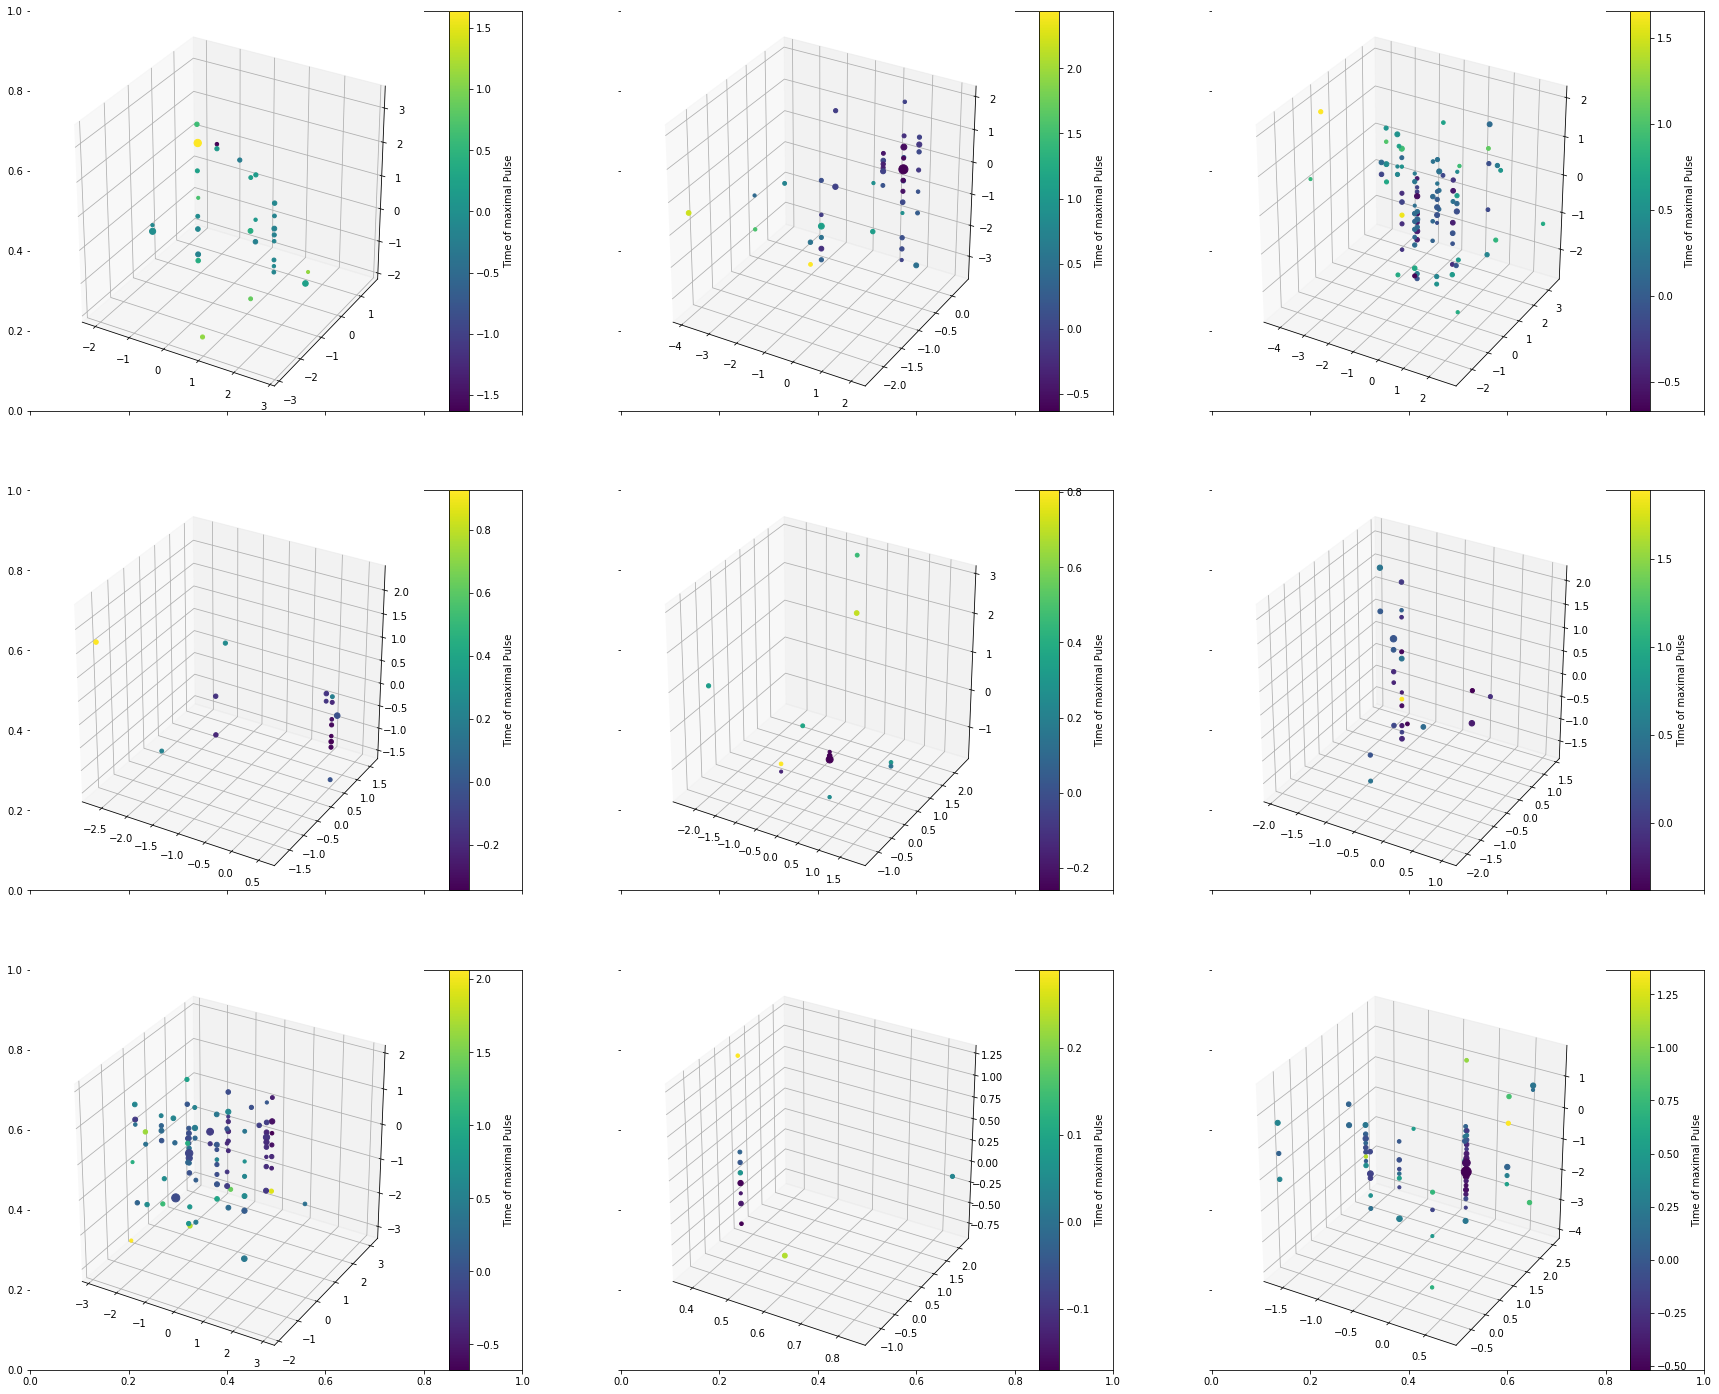

In [50]:

plot_samples(samples_numu_nc[100:109], attribute_to_plot='ChargeFirstPulse')

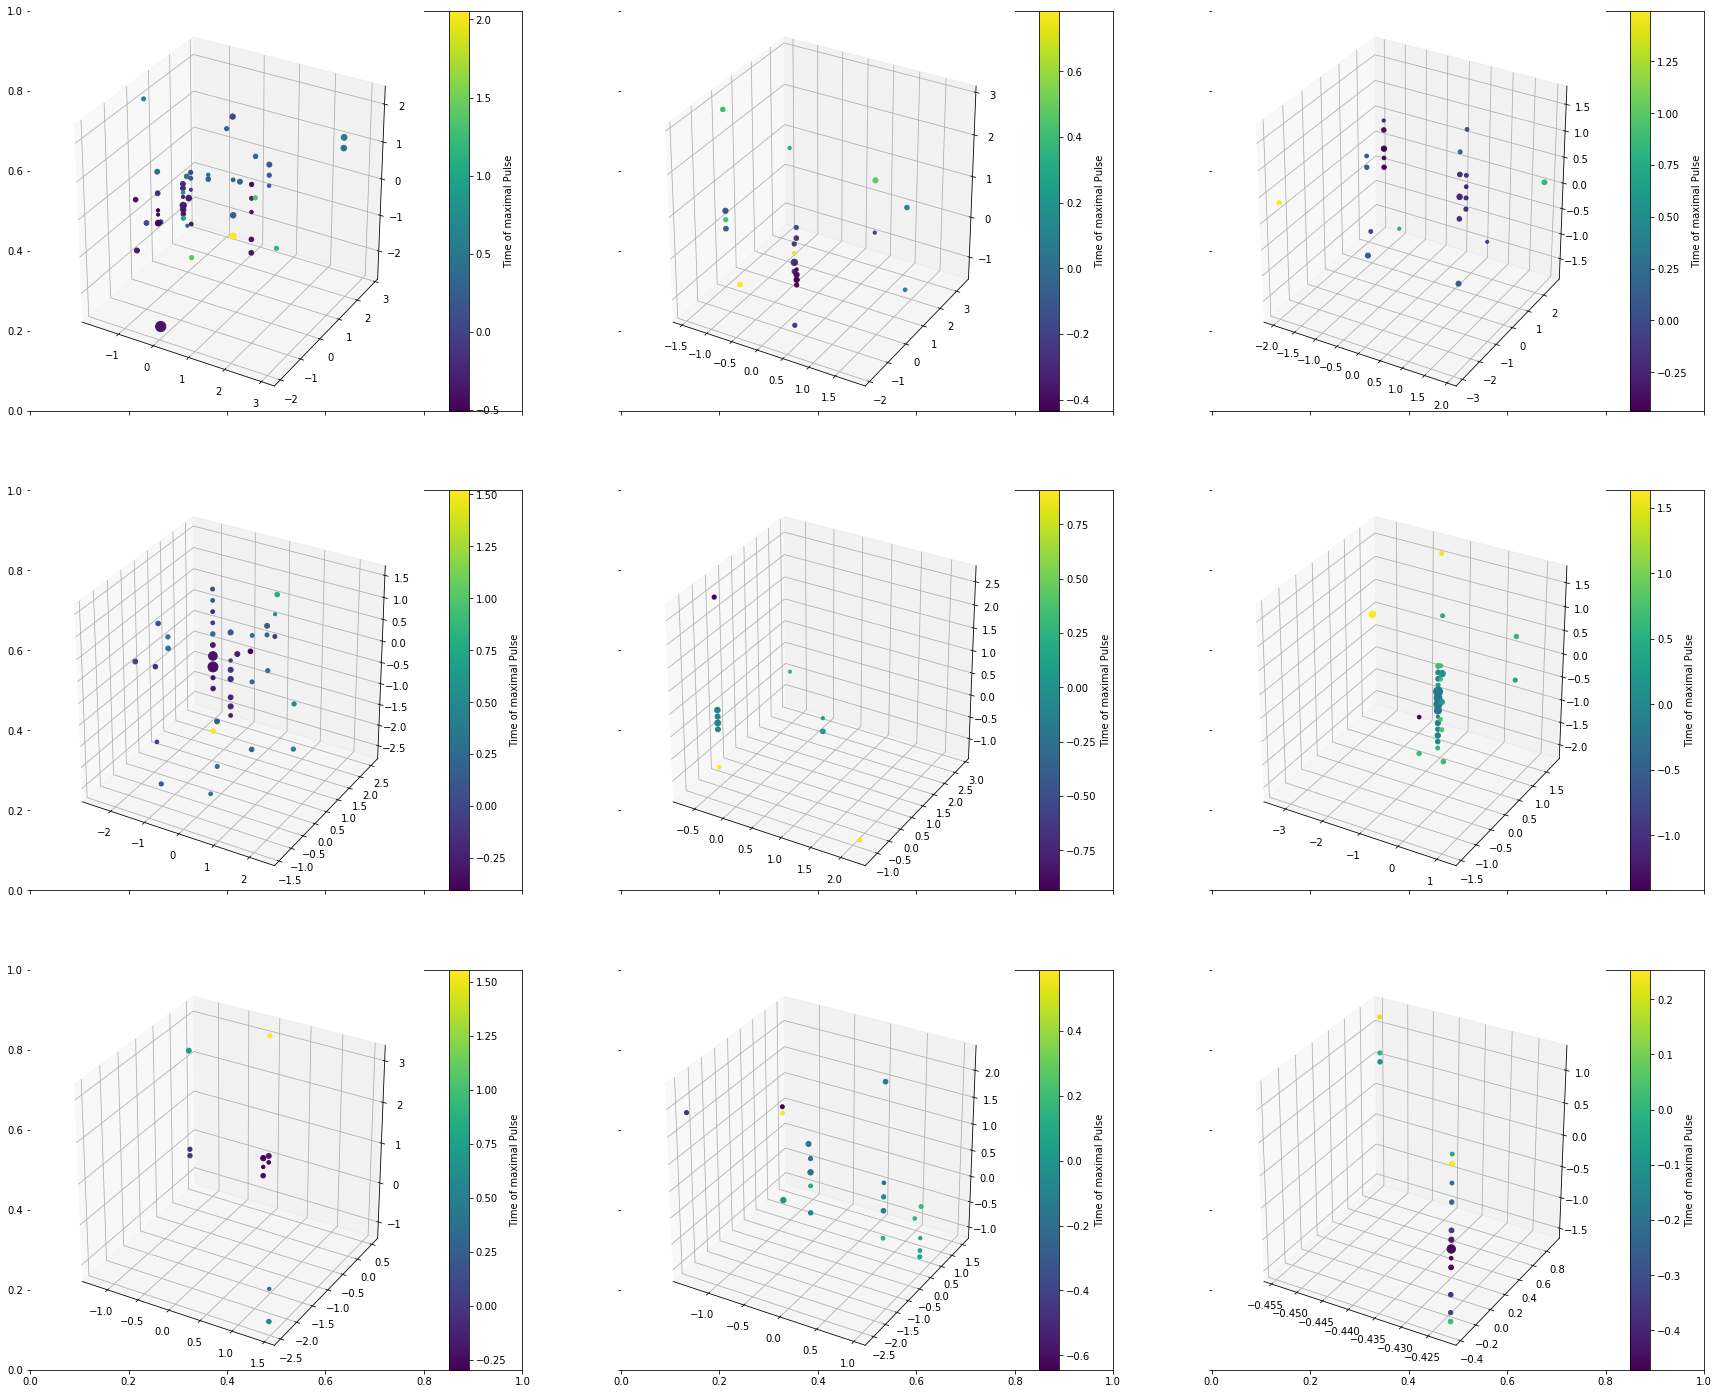

In [51]:

plot_samples(samples_numu_cc[100:109], attribute_to_plot='ChargeFirstPulse')


   ChargeFirstPulse  ChargeLastPulse  ChargeMaxPulse  TimeFirstPulse  \
0             0.525            0.525        0.525000        1.088133   
1             0.975            0.975        0.975000        0.175132   
2             0.925            0.925        0.925000        0.224132   
3             0.625            2.325        2.325000       -0.039868   
4            13.375            0.675       39.525002       -0.121868   

   TimeLastPulse  TimeMaxPulse  TimeVariance   VertexX   VertexY   VertexZ  
0       1.088133      1.088133      1.088133 -1.328511 -1.538754 -1.300750  
1       0.175132      0.175132      0.175132 -0.456646  0.282958  1.252494  
2       0.224132      0.224132      0.224132 -0.456646  0.282958  0.796213  
3      -0.012868     -0.012868      0.026580 -0.456646  0.282958  0.339664  
4      -0.049868     -0.115868      0.114974 -0.456646  0.282958 -0.116617  


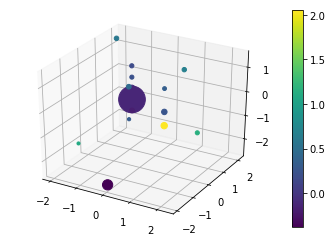

In [34]:
plot_sample(non_track_idx[138])

In [3]:
tmu = tables.open_file('data_dragon_3y_numu.hd5')
te = tables.open_file('data_dragon_3y_nue.hd5')
ttau = tables.open_file('data_dragon_3y_nutau.hd5')

In [5]:
tmu.root.RecoX

NoSuchNodeError: group ``/`` does not have a child named ``RecoX``